<a href="https://colab.research.google.com/github/IamAnubhavDash/MnP_Assignment/blob/main/mnp_assgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.a The DNA Helix Printer Write a function print_helix(n, turns) where n is the width of the helix and turns is the number of full cycles. The helix is formed by two strands.

The strands oscillate using a sine-wave-like pattern.
The characters for the strands should cycle through A, C, G, T.
Constraint: You must handle the spacing dynamically.
Example Output (n=4, turns=1):

A      A
 C    C
  G  G
   TT
  A  A
 C    C
G      G

In [46]:
def print_helix(n, turns):
    bases = ["A", "C", "G", "T"]
    b = 0
    period = 2 * n - 1
    total_lines = turns * period

    for i in range(total_lines):
        pos = i % period
        if pos >= n:
            left = 2 * n - 2 - pos
        else:
            left = pos

        right = 2 * n - 1 - left

        base = bases[b]
        if left == right:
            line = " " * left + base * 2
        else:
            middle_spaces = right - left - 1
            line = " " * left + base + " " * middle_spaces + base

        print(line)
        b = (b + 1) % 4



In [47]:
print_helix(4,1)

A      A
 C    C
  G  G
   TT
  A  A
 C    C
G      G


1.b The Custom Sorter Write a function sort_strings(s_list) that takes a list of strings and sorts them based on the following priority rules:

Primary: Length of the string (Ascending).
Secondary: Number of distinct vowels (a, e, i, o, u) present in the string (Descending).
Tertiary: Alphabetical order (Ascending).
Example: Input: ["apple", "banana", "kiwi", "sky", "aieou", "z"] Output: ['z', 'sky', 'kiwi', 'aieou', 'apple', 'banana']

In [48]:
def sort_strings(s_list):
    vowels = set("aeiou")

    def sort_key(s):
        length = len(s)
        distinct_vowels = len({ch for ch in s.lower() if ch in vowels})
        alpha = s.lower()
        return (length, -distinct_vowels, alpha)

    return sorted(s_list, key=sort_key)


In [49]:
data = ["apple", "banana", "kiwi", "sky", "aieou", "z"]
print(sort_strings(data))

['z', 'sky', 'kiwi', 'aieou', 'apple', 'banana']


part2 task1---Consider that you are processing raw data from a sensor in a physics lab. The sensor is noisy and occasionally malfunctions.

Task:

Read the file sensor_logs.csv without using Pandas.
Filter: Ignore rows where status is "ERR" OR voltage > 10.0.
Analysis: Calculate the Mean and Standard Deviation for each sensor.

In [50]:
import math

def analyze_sensors(filename):
    sensors = {}  # sensor_id → list of voltages

    with open(filename, "r") as f:
        header = f.readline()  # skip header

        for line in f:
            parts = line.strip().split(",")

            # Expecting exactly: timestamp, sensor_id, voltage, status
            if len(parts) != 4:
                continue

            timestamp, sensor_id, voltage_s, status = parts

            try:
                voltage = float(voltage_s)
            except:
                continue
            if status == "ERR" or voltage > 10.0:
                continue

            sensors.setdefault(sensor_id, []).append(voltage)

    for sensor, vals in sensors.items():
        if not vals:
            continue

        mean = sum(vals) / len(vals)
        var = sum((v - mean)**2 for v in vals) / len(vals)
        sd = math.sqrt(var)

        print(f"{sensor}: mean={mean:.3f}, std_dev={sd:.3f}, count={len(vals)}")


In [51]:
analyze_sensors("sensor_log.csv")


S3: mean=3.927, std_dev=0.577, count=124
S1: mean=4.026, std_dev=0.543, count=111
S2: mean=4.055, std_dev=0.583, count=102
S4: mean=3.973, std_dev=0.584, count=128


SCIPY TASKS

Task 1
Find the positive root of the transcendental equation: x^2-5sin(x)-2

In [52]:
from scipy.optimize import fsolve
import numpy as np

def f(x):
    return x**2 - 5*np.sin(x) - 2

print(fsolve(f, 10))


[2.35423895]


 Task 2
 Simulate a radioactive decay chain: A → B → C (Stable)
  The system:
  dA/dt = -k1 * A
  dB/dt =  k1 * A - k2 * B
  dC/dt =  k2 * B
 Given:
   k1 = 0.5, k2 = 0.1
  Initial conditions: A0 = 100, B0 = 0, C0 = 0

 Goal:
   Find the concentration of B at t = 5.0

In [53]:
from scipy.integrate import solve_ivp
import numpy as np

k1 = 0.5
k2 = 0.1
def decay_chain(t, y):
    A, B, C = y
    dA = -k1 * A
    dB = k1 * A - k2 * B
    dC = k2 * B
    return [dA, dB, dC]

y0 = [100, 0, 0]
sol = solve_ivp(decay_chain, [0, 5], y0, t_eval=[5])

# B at t = 5
B_at_5 = sol.y[1][0]
print("Concentration of B at t = 5.0 =", B_at_5)

Concentration of B at t = 5.0 = 65.5518353591489


Q. Explain, how would you overcome this issue (you may introduce additional parameters if needed)?

Q. Does the value of your param affect your results? If they do then explain how.

1) to clear this issue we introduce a new parameter "l" called softening length which will be with r^2 --> r^2 + l^2... this would work because l is trying to make mass spread out of its point defination.. so in the formula given the denominator will be changed from (rj-ri)^3 to ((rj-ri)^2 + l^2)^3/2.
we dont change the numerator because Softening only modifies the magnitude of the denominator, not the direction.Softening models stars as having a small “spread-out mass,” but the center of mass is still located at rⱼ.
If you softened the vector, it would incorrectly change the direction of gravitational attraction which is not physical.

2) yes the parameter will affect the results immensely.

Case1-(l-->0) the whole simulation is close to the newtonian gravity although Numerical instability when particles get close and this is unstable for large N since there is a high probability of very close interaction making r->0 so 1/r^3 will shoot pretty fast.

Case2-(l very large) this makes for a smooth and stable evolution, there is no particle ejection but this is unrealistic physics , particles will ignore each other at small scales and collisions and tight interaction disappers.This becomes too smoothed, no longer real gravity.

case3-(optimal value of l) this is what helps the problem of singularities, allows long term stable simulations and minimize energy drifts which tackles the problem of 1)expanding orbits 2)evaporating galaxies and 3)particles flying off too fast.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Simulation Parameters

G = 1.0           # Gravitational Constant
PARAM = 0.1       # Your parameter (if needed)
DT = 0.01         # Time step
STEPS = 200       # Number of steps
N_PARTICLES = 100 # Number of particles

def generate_initial_state(N, seed=42):
    """
    Generates N random particles.
    Returns:
        positions: (N, 2) array
        velocities: (N, 2) array
        masses: (N,) array
    """
    np.random.seed(seed)
    positions = np.random.randn(N, 2)
    velocities = np.random.randn(N, 2) * 0.5
    masses = np.random.rand(N) + 0.5 # Masses between 0.5 and 1.5
    return positions, velocities, masses

In [55]:
def calculate_accelerations(positions, masses, G=1.0, param=0.1):

    disp = positions[np.newaxis, :, :] - positions[:, np.newaxis, :]
    dist2 = np.sum(disp**2, axis=2) + param**2
    np.fill_diagonal(dist2, np.inf)
    inv_r3 = dist2 ** (-1.5)
    factors = G * masses[np.newaxis, :] * inv_r3
    acc = np.sum(factors[..., np.newaxis] * disp, axis=1)

    return acc


def symplectic_euler_step(positions, velocities, accelerations, dt):

    velocities = velocities + accelerations * dt
    positions = positions + velocities * dt

    return positions, velocities


Simulation of 100 particles for 200 steps took: 0.1949s


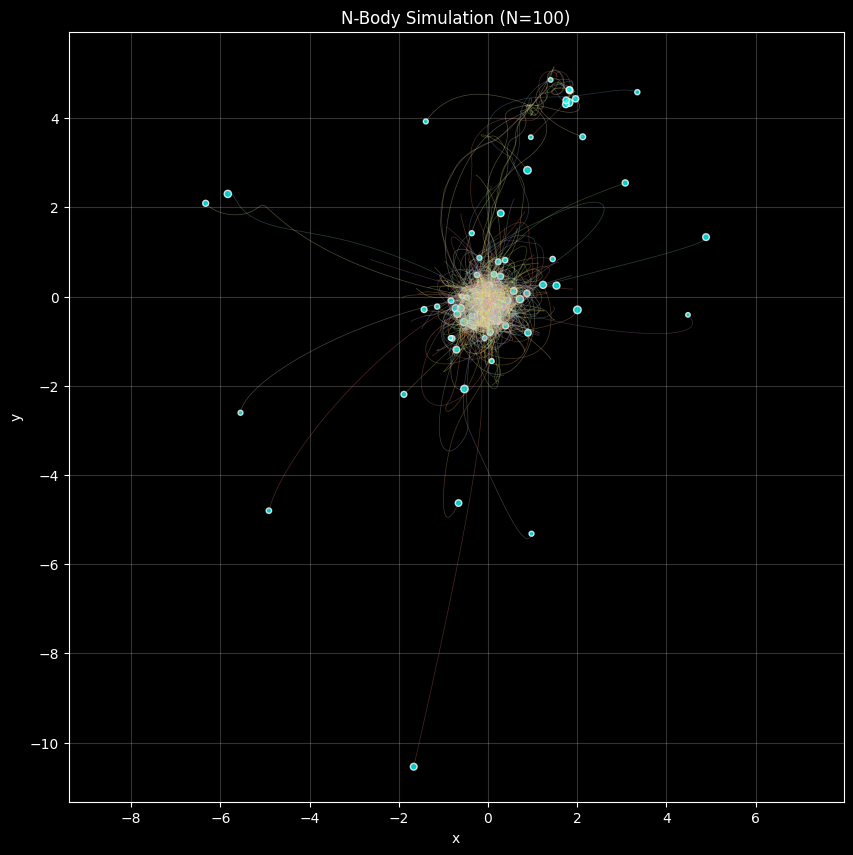

In [56]:
def run_simulation(N=100, steps=200, dt=0.01):
    positions, velocities, masses = generate_initial_state(N)

    trajectory_history = []
    trajectory_history.append(positions.copy())

    start_time = time.time()

    for _ in range(steps):
        # Calculate forces
        acc = calculate_accelerations(positions, masses, G, PARAM)

        # Integrate
        positions, velocities = symplectic_euler_step(positions, velocities, acc, dt)

        # Store history
        trajectory_history.append(positions.copy())

    end_time = time.time()
    print(f"Simulation of {N} particles for {steps} steps took: {end_time - start_time:.4f}s")

    return np.array(trajectory_history), masses

# Main Simualtion
history, masses = run_simulation(N=N_PARTICLES, steps=STEPS, dt=DT)

plt.figure(figsize=(10, 10))
plt.style.use('dark_background')

for i in range(N_PARTICLES):
    plt.plot(history[:, i, 0], history[:, i, 1], alpha=0.3, lw=0.5)

# Plot final positions
plt.scatter(history[-1, :, 0], history[-1, :, 1], s=masses*20, c='cyan', alpha=0.8, edgecolors='white')

plt.title(f"N-Body Simulation (N={N_PARTICLES})")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.2)
plt.axis('equal')
plt.show()

#conservation of energy


In [57]:
import numpy as np

def calculate_total_energy(positions, velocities, masses, G=1.0, param=0.1):
    # TODO 3.1: Calculate Kinetic Energy
    # Kinetic Energy T = 1/2 * m * v^2
    T = 0.5 * np.sum(masses * np.sum(velocities**2, axis=1))

    # TODO 3.2: Calculate Potential Energy
    # Potential Energy U = - sum(G * m_i * m_j / r_ij)
    N = len(masses)
    U = 0.0
    for i in range(N):
        for j in range(i+1, N):
            r = np.linalg.norm(positions[i] - positions[j])
            U -= G * masses[i] * masses[j] / (r + param)

    # TODO 3: Return Total Energy (Kinetic + Potential)
    return T + U

# Test for a simple 2-body static case
pos_test = np.array([[1.0, 0.0], [-1.0, 0.0]])
vel_test = np.array([[0.0, 0.0], [0.0, 0.0]])
mass_test = np.array([1.0, 1.0])

E_check = calculate_total_energy(pos_test, vel_test, mass_test, G=1.0, param=0.0)
print(f"Test Case Energy: {E_check:.4f} (Expected: -0.500)")


Test Case Energy: -0.5000 (Expected: -0.500)


Advanced Integration with SciPy

In computational physics, we often use established libraries to verify our manual implementations. SciPy's solve_ivp is a powerful integrator with adaptive time-stepping.

The Challenge: solve_ivp requires the system state to be a 1D array. You currently have 2D arrays for positions and velocities.

TODO:

Flatten your initial positions and velocities into a single 1D array y0.
Implement the derivative function nbody_ode(t, y, masses, ...) which:
Unpacks the 1D y back into positions and velocities.
Calculates accelerations using your function from Task 1.
Returns the derivatives (velocities and accelerations) as a flattened 1D array.
Run the solver.

In [58]:
from scipy.integrate import solve_ivp

# TODO 4: Implement a function nbody_ode that bridges the gap between scipy 1D requirement and your 2D logic.

def nbody_ode(t, y, masses, G):
    N = len(masses)
    pos = y[:2*N].reshape(N, 2)
    vel = y[2*N:].reshape(N, 2)
    acc = calculate_accelerations(pos, masses, G)
    return np.concatenate([vel.flatten(), acc.flatten()])

# TODO 5: Run the simulation using solve_ivp.

N_SCIPY = 10
pos_s, vel_s, mass_s = generate_initial_state(N_SCIPY)
t_span = (0, 2.0)
print(f"Running SciPy Integrator for N={N_SCIPY}...")

# TODO 5.1: Prepare the initial 1D state vector 'y0' from pos_s and vel_s

y0 = np.concatenate([pos_s.flatten(), vel_s.flatten()])

# TODO 5.2: Call solve_ivp

sol = solve_ivp(
    fun=lambda t, y: nbody_ode(t, y, mass_s, 1.0),
    t_span=t_span,
    y0=y0,
    method="RK45",
    rtol=1e-9,
    atol=1e-9
)

if sol:
    print(f"SciPy solved in {len(sol.t)} steps.")
    print(f"Final shape of solution: {sol.y.shape}")


Running SciPy Integrator for N=10...
SciPy solved in 710 steps.
Final shape of solution: (40, 710)


#Damped coupled oscillators

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd

df = pd.read_csv("datae.csv")
print(df.head())


In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# load CSV (tries data.csv first, falls back to datae.csv)
import os
if os.path.exists("data.csv"):
    filename = "data.csv"
elif os.path.exists("datae.csv"):
    filename = "datae.csv"
else:
    raise FileNotFoundError("Neither data.csv nor datae.csv found in working directory.")
df = pd.read_csv(filename)

# ensure columns are numeric and sorted by time (column named t or first column)
if "t" in df.columns:
    time_col = "t"
else:
    time_col = df.columns[0]
df[time_col] = pd.to_numeric(df[time_col], errors="coerce")
df = df.dropna(subset=[time_col]).reset_index(drop=True)
df = df.sort_values(by=time_col).reset_index(drop=True)

# map angle columns (accept common names)
possible_theta1 = ["theta_1", "theta1", "theta_01", "theta_1.0"]
possible_theta2 = ["theta_2", "theta2", "theta_02", "theta_2.0"]
theta1_col = next((c for c in df.columns if c in possible_theta1), None)
theta2_col = next((c for c in df.columns if c in possible_theta2), None)
if theta1_col is None or theta2_col is None:
    # try to use 2nd and 3rd columns
    theta1_col = df.columns[1]
    theta2_col = df.columns[2]

t_data = df[time_col].values
theta1_data = pd.to_numeric(df[theta1_col], errors="coerce").values
theta2_data = pd.to_numeric(df[theta2_col], errors="coerce").values

# drop rows with NaNs in the required columns
mask = (~np.isnan(t_data)) & (~np.isnan(theta1_data)) & (~np.isnan(theta2_data))
t_data = t_data[mask]
theta1_data = theta1_data[mask]
theta2_data = theta2_data[mask]

# compute numerical derivatives for initial velocity guesses
dt = np.mean(np.diff(t_data)) if len(t_data) > 1 else 1.0
theta1_dot = np.gradient(theta1_data, t_data)
theta2_dot = np.gradient(theta2_data, t_data)

t_span = (t_data.min(), t_data.max())

def coupled_ode(t, y, c1, c2, k1, k2, kc):
    th1, th2, w1, w2 = y
    dth1 = w1
    dth2 = w2
    dw1 = -c1*w1 - k1*th1 - kc*(th1 - th2)
    dw2 = -c2*w2 - k2*th2 - kc*(th2 - th1)
    return [dth1, dth2, dw1, dw2]

def simulate(params):
    c1, c2, k1, k2, kc = params
    y0 = [theta1_data[0], theta2_data[0], theta1_dot[0], theta2_dot[0]]
    sol = solve_ivp(
        fun=lambda t, y: coupled_ode(t, y, c1, c2, k1, k2, kc),
        t_span=t_span,
        y0=y0,
        t_eval=t_data,
        method="RK45",
        rtol=1e-7,
        atol=1e-9
    )
    return sol

def residuals(params):
    sol = simulate(params)
    if not sol.success:
        # return large residuals to discourage optimizer from this region
        return np.full(2*len(t_data), 1e6)
    th1_pred = sol.y[0]
    th2_pred = sol.y[1]
    return np.concatenate([th1_pred - theta1_data, th2_pred - theta2_data])

# initial guess and bounds (enforce non-negative damping/stiffness)
initial_guess = np.array([0.1, 0.1, 1.0, 1.0, 0.5])
lower_bounds = np.zeros(5)
upper_bounds = np.full(5, np.inf)

result = least_squares(residuals, initial_guess, bounds=(lower_bounds, upper_bounds), xtol=1e-8, ftol=1e-8)

c1, c2, k1, k2, kc = result.x

# final solve with fitted parameters
sol = simulate(result.x)
th1_fit = sol.y[0]
th2_fit = sol.y[1]

print("Estimated parameters:")
print(f"c1 = {c1:.6g}")
print(f"c2 = {c2:.6g}")
print(f"k1 = {k1:.6g}")
print(f"k2 = {k2:.6g}")
print(f"kc = {kc:.6g}")

# plotting measured vs fitted
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t_data, theta1_data, ".", label="theta_1 data", alpha=0.6)
plt.plot(t_data, th1_fit, "-", label="theta_1 fit")
plt.xlabel("t")
plt.ylabel("theta_1")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_data, theta2_data, ".", label="theta_2 data", alpha=0.6)
plt.plot(t_data, th2_fit, "-", label="theta_2 fit")
plt.xlabel("t")
plt.ylabel("theta_2")
plt.legend()

plt.tight_layout()
plt.show()
